# Linear Regression

In [1]:
import tensorflow as tf
import numpy as np

In [6]:
num_data = 1000
sample_data = []
for i in range(num_data):
    x1 = np.random.normal(0.0, 0.5)
    y1 = 0.1 * x1 + 0.3 + np.random.normal(0.0, 0.02)
    sample_data.append([x1, y1])
#print(sample_data)

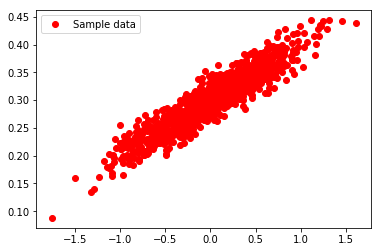

In [14]:
import matplotlib.pyplot as plt

x_data = [v[0] for v in sample_data]
y_data = [v[1] for v in sample_data]

plt.plot(x_data, y_data, 'ro', label='Sample data')
plt.legend()
plt.show()

In [16]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

print(W)
print(b)

<tf.Variable 'Variable_2:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Variable_3:0' shape=(1,) dtype=float32_ref>


In [17]:
y = W * x_data + b

print(y)

Tensor("add:0", shape=(1000,), dtype=float32)


In [19]:
loss = tf.reduce_mean(tf.square(y - y_data))

print(loss)

Tensor("Mean_1:0", shape=(), dtype=float32)


In [21]:
optimizer = tf.train.GradientDescentOptimizer(0.5)


In [22]:
train = optimizer.minimize(loss)

0 [0.08027263] [0.29973644] 0.00045581977


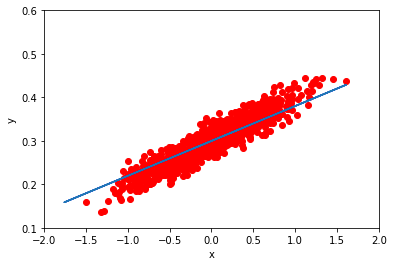

1 [0.08522855] [0.2997571] 0.0004128853


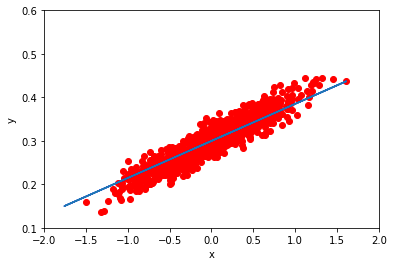

2 [0.08893573] [0.29977775] 0.000388861


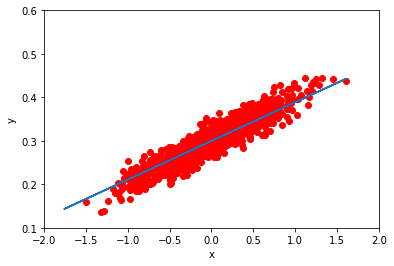

3 [0.09170882] [0.2997932] 0.00037541808


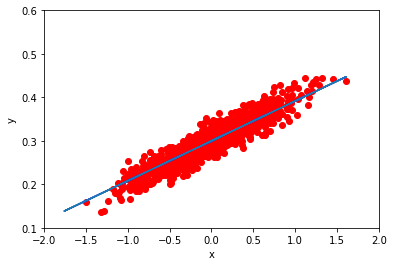

4 [0.0937832] [0.29980478] 0.00036789596


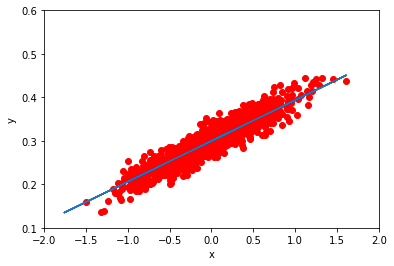

5 [0.09533491] [0.29981342] 0.00036368685


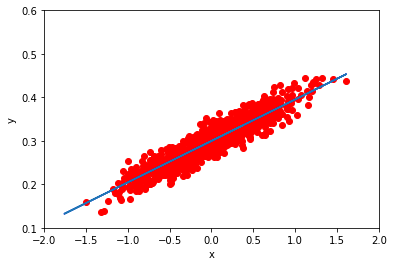

6 [0.09649564] [0.2998199] 0.00036133165


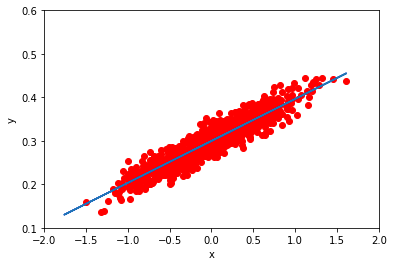

7 [0.09736392] [0.2998247] 0.00036001374


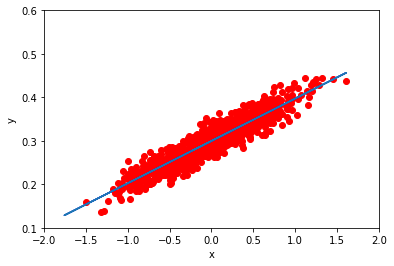

8 [0.09801342] [0.29982835] 0.00035927637


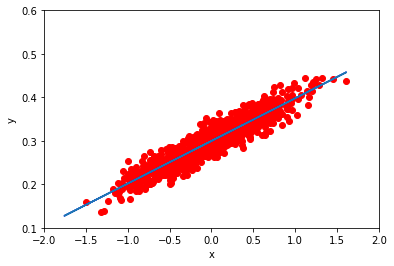

9 [0.09849926] [0.29983103] 0.00035886365


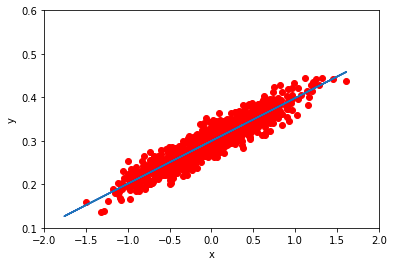

Wall time: 2 s


In [35]:
%%time

sess = tf.Session()
sess.run(tf.global_variables_initializer())

num_epochs = 10

for step in range(num_epochs):
    sess.run(train)
    
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    
    plt.plot(x_data, y_data, 'ro')
    y_ = W * x_data + b
    plt.plot(x_data, sess.run(y_), 'b')
    plt.plot(x_data, sess.run(W)*x_data+sess.run(b))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-2, 2)
    plt.ylim(0.1, 0.6)
    plt.show()



# SOFTMAX REGRESSION (Image Classification)

## MNIST DATA SET

Extracting ./MNIST_DATA/train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA/t10k-labels-idx1-ubyte.gz
X_train.shape:  (55000, 784)
Y_train.shape:  (55000, 10)
X_test.shape:  (10000, 784)
Y_test.shape:  (10000, 10)
digit_img.shape:  (784,)
digit_label.shape:  (10,)


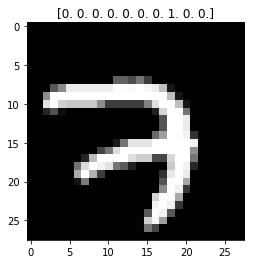

In [48]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./MNIST_DATA/", one_hot=True)

X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)

digit_img = X_train[0]
digit_label = Y_train[0]
print("digit_img.shape: ", digit_img.shape)
print("digit_label.shape: ", digit_label.shape)
plt.imshow(digit_img.reshape(28, 28), cmap='gray')
plt.title(digit_label)
plt.show()


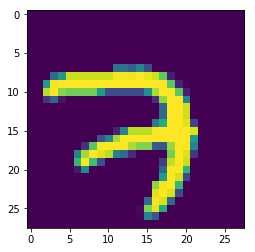

(784,)
[0.         0.         0.8862746  0.9960785  0.81568635 0.7803922
 0.7803922  0.7803922  0.7803922  0.54509807 0.2392157  0.2392157
 0.2392157  0.2392157  0.2392157  0.5019608  0.8705883  0.9960785
 0.9960785  0.7411765 ]


In [49]:
plt.imshow(digit_img.reshape(28, 28))
plt.show()

print(digit_img.shape)
print(digit_img.reshape(28,28)[10,0:20])

# MNIST Image Classification using Softmax Regression

In [51]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

data = input_data.read_data_sets("./MNIST_DATA", one_hot=True)

Extracting ./MNIST_DATA\train-images-idx3-ubyte.gz
Extracting ./MNIST_DATA\train-labels-idx1-ubyte.gz
Extracting ./MNIST_DATA\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_DATA\t10k-labels-idx1-ubyte.gz


In [52]:
# parameters
NUM_STEPS = 1000
MINIBATCH_SIZE = 100

In [54]:
# input placeholder
x = tf.placeholder(tf.float32, [None, 784])
y_true = tf.placeholder(tf.float32, [None, 10])

# variables
W = tf.Variable(tf.zeros([784, 10]))

# logit
y_pred = tf.matmul(x, W)

# loss
cross_entropy = tf.reduce_mean(
                    tf.nn.softmax_cross_entropy_with_logits(
                        logits=y_pred, labels=y_true))
# optimizer
gd_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# accuracy
correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))


In [55]:
%%time
# train
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for _ in range(NUM_STEPS):
    batch_xs, batch_ys = data.train.next_batch(MINIBATCH_SIZE)
    sess.run(gd_step, feed_dict={x: batch_xs, 
                                 y_true: batch_ys})

Wall time: 1.65 s


In [56]:
%%time
# test
ans = sess.run(accuracy, feed_dict={x: data.test.images,
                                    y_true: data.test.labels})
print("Accuracy: {:.4}%".format(ans*100))

Accuracy: 91.59%
Wall time: 199 ms


Predicted Label:  3
Real Label:  3


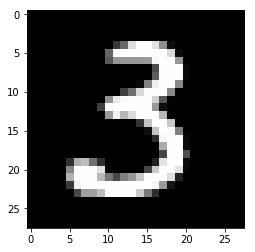

In [129]:
# predict
test_num = random.randint(0, data.test.images.shape[0])

img = mnist.test.images[test_num]
pred = sess.run(tf.argmax(y_pred, 1), feed_dict={x: [img]})
print("Predicted Label: ", pred[0])
print("Real Label: ", np.argmax(data.test.labels[test_num]))

img = np.resize(img, (28,28))
plt.imshow(img, cmap='gray')
plt.show()